# Feature Transformations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

## Learning Objectives

- Use correlations and other algorithms to inform feature selection
- Create new features for use in modeling
    - Use binning to turn numerical into categorical features
    - Use `PolynomialFeatures` to build compound features

## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

In [2]:
wine = pd.read_csv('data/wine.csv')

In [3]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


## Decisions, Decisions, Decisions...

Now: Which columns (predictors) should I choose? 

There are 12 predictors I could choose from. For each of these predictors, I could either use it or not use it in my model, which means that there are $2^{12} = 4096$ _different_ models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

We'll explore a few methods in the sections below.

## Correlation

Our first attempt might be just see which features are _correlated_ with the target to make a prediction.

We can use the correlation metric in making a decision.

In [4]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


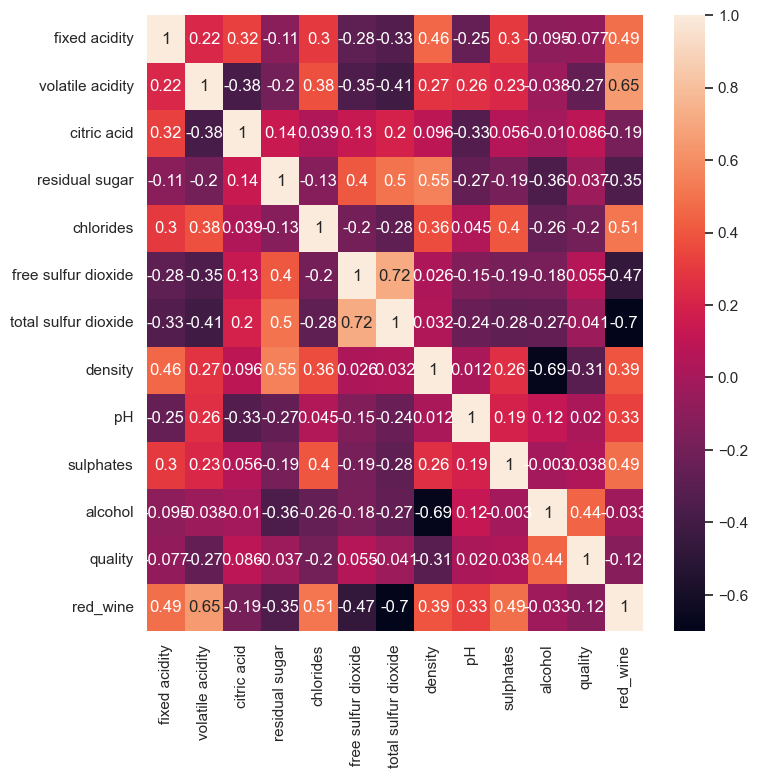

In [5]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(wine.corr(), annot=True);

In [6]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.

wine_corrs = wine.corr()['quality'].map(abs).sort_values(ascending=False)
wine_corrs

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

It looks like we can see the features have different correlations with the target. The larger the correlation, the more we'd expect these features to be better predictors.

Let's try using only a subset of the strongest correlated features to make our model.

In [8]:
# Let's choose 'alcohol' and 'density'.

wine_preds = wine[['alcohol', 'density']]
wine_target = wine['quality']
preds_with_const = sm.add_constant(wine_preds)

In [9]:
model = sm.OLS(endog=wine_target, exog=preds_with_const).fit()

In [10]:
model.rsquared

0.19741993980311312

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     798.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.48e-311
Time:                        11:40:35   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6494   BIC:                         1.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8095      4.512      0.623      0.533      -6.035      11.654
alcohol        0.3246      0.011     28.991      0.000       0.303       0.347
density       -0.3991      4.454     -0.090      0.929      -9.130       8.332
==============================================================================
Omnibus:                      123.912   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.761
Skew:                           0.031   Prob(JB):                     6.47e-57
Kurtosis:                       3.976   Cond. No.                     6.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Engineering

> Domain knowledge can be helpful here! 🧠

In practice this aspect of data preparation can constitute a huge part of the data scientist's work. As we move into data modeling, much of the goal will be a matter of finding––**or creating**––features that are predictive of the targets we are trying to model.

There are infinitely many ways of transforming and combining a starting set of features. Good data scientists will have a nose for which engineering operations will be likely to yield fruit and for which operations won't. And part of the game here may be getting someone else on your team who understands what the data represent better than you!

## Distribution Transformations

### Log Scaling

Linear regression can work better if the predictor and target are normally distributed. 

**Log-scaling** can be a good tool to make *right-skewed* data more normal.

(For *left-skewed* data, which is rarer, we can try transforming our data by raising it to an exponent greater than 1.)

Suppose e.g. a kde plot of my predictor $X$ looks like this:

![original](images/skewplot.png)

In that case, the kde plot of a log-transformed version of $X$ could look like this:

![log](images/logplot.png)

Let's set up a problem like this.

In [12]:
diamonds = sns.load_dataset('diamonds')

In [13]:
X = diamonds.select_dtypes(include=float)
y = diamonds['price']

In [14]:
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


### Build model

In [15]:
sm.OLS(endog=y, exog=sm.add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:47:38   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check distribution of target

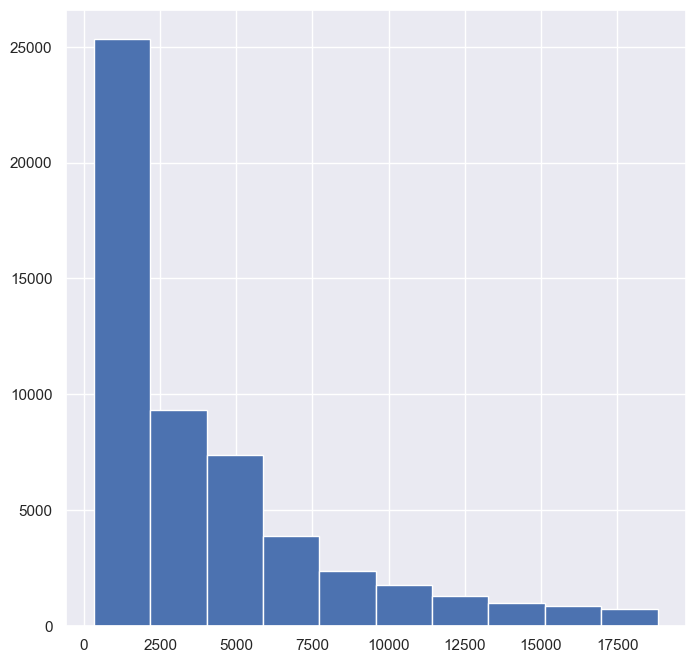

In [16]:
y.hist();

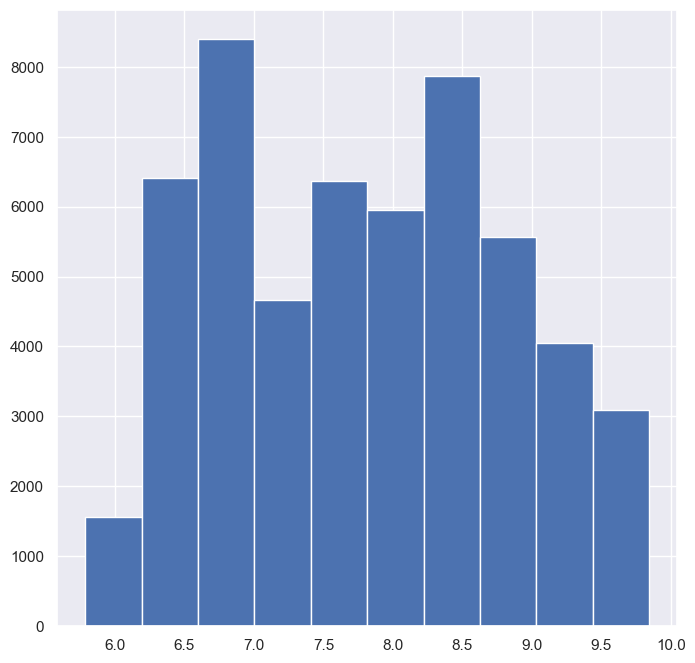

In [17]:
y_scld = np.log(y)
y_scld.hist();

In [18]:
np.exp(y_scld)

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53940, dtype: float64

In [19]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

### Build model with log-scaled target

In [20]:
model_diam = sm.OLS(y_scld, sm.add_constant(X)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.095e+05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:49:38   Log-Likelihood:                -7776.1
No. Observations:               53940   AIC:                         1.557e+04
Df Residuals:                   53933   BIC:                         1.563e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8952      0.084     10.712      0.000       0.731       1.059
carat         -0.7028      0.012    -59.551      0.000      -0.726      -0.680
depth          0.0220      0.001     21.403      0.000       0.020       0.024
table         -0.0098      0.001    -16.989      0.000      -0.011      -0.009
x              1.0757      0.008    133.763      0.000       1.060       1.091
y              0.0456      0.005      9.576      0.000       0.036       0.055
z              0.0648      0.008      7.836      0.000       0.049       0.081
==============================================================================
Omnibus:                    49564.202   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24894704.347
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                     108.007   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

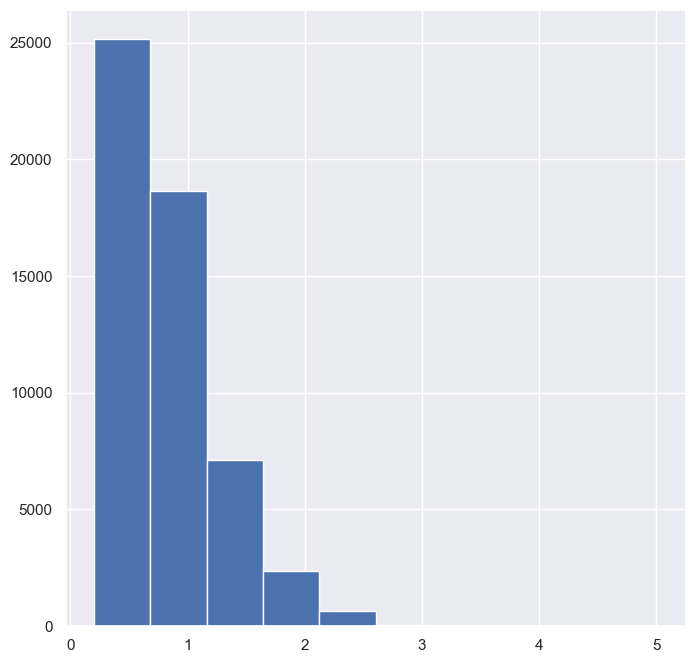

In [21]:
X['carat'].hist()

<Axes: >

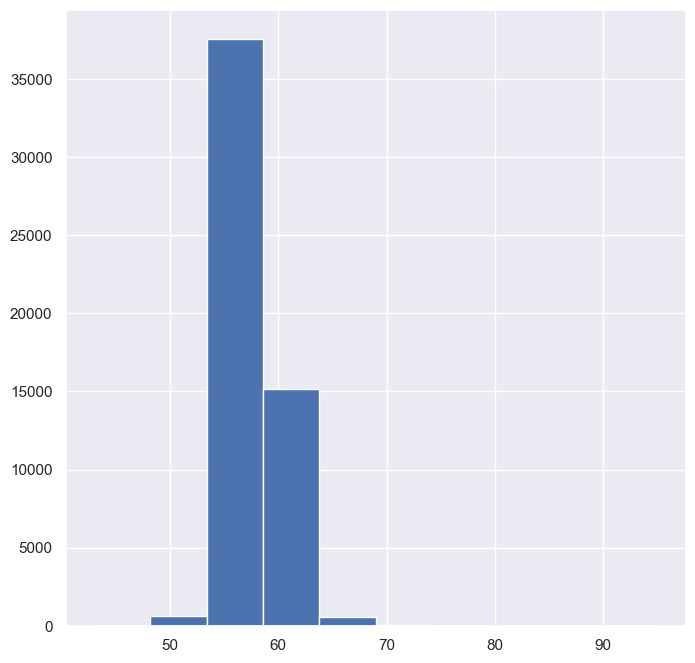

In [22]:
X['table'].hist()

In [23]:
X_copy = X.copy()
X_copy['carat'] = np.log(X_copy['carat'])
X_copy.head()

,carat,depth,table,x,y,z
0,-1.469676,61.5,55.0,3.95,3.98,2.43
1,-1.560648,59.8,61.0,3.89,3.84,2.31
2,-1.469676,56.9,65.0,4.05,4.07,2.31
3,-1.237874,62.4,58.0,4.20,4.23,2.63
4,-1.171183,63.3,58.0,4.34,4.35,2.75


In [24]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [25]:
model_diam = sm.OLS(y_scld, sm.add_constant(X_copy)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.299e+05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:54:35   Log-Likelihood:                -3481.6
No. Observations:               53940   AIC:                             6977.
Df Residuals:                   53933   BIC:                             7040.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6143      0.104    111.987      0.000      11.411      11.818
carat          1.7346      0.015    116.051      0.000       1.705       1.764
depth         -0.0315      0.001    -31.717      0.000      -0.033      -0.030
table         -0.0186      0.001    -34.745      0.000      -0.020      -0.018
x             -0.0464      0.009     -4.905      0.000      -0.065      -0.028
y              0.0077      0.004      1.753      0.080      -0.001       0.016
z              0.0262      0.008      3.433      0.001       0.011       0.041
==============================================================================
Omnibus:                      798.683   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1429.174
Skew:                           0.091   Prob(JB):                    4.56e-311
Kurtosis:                       3.776   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

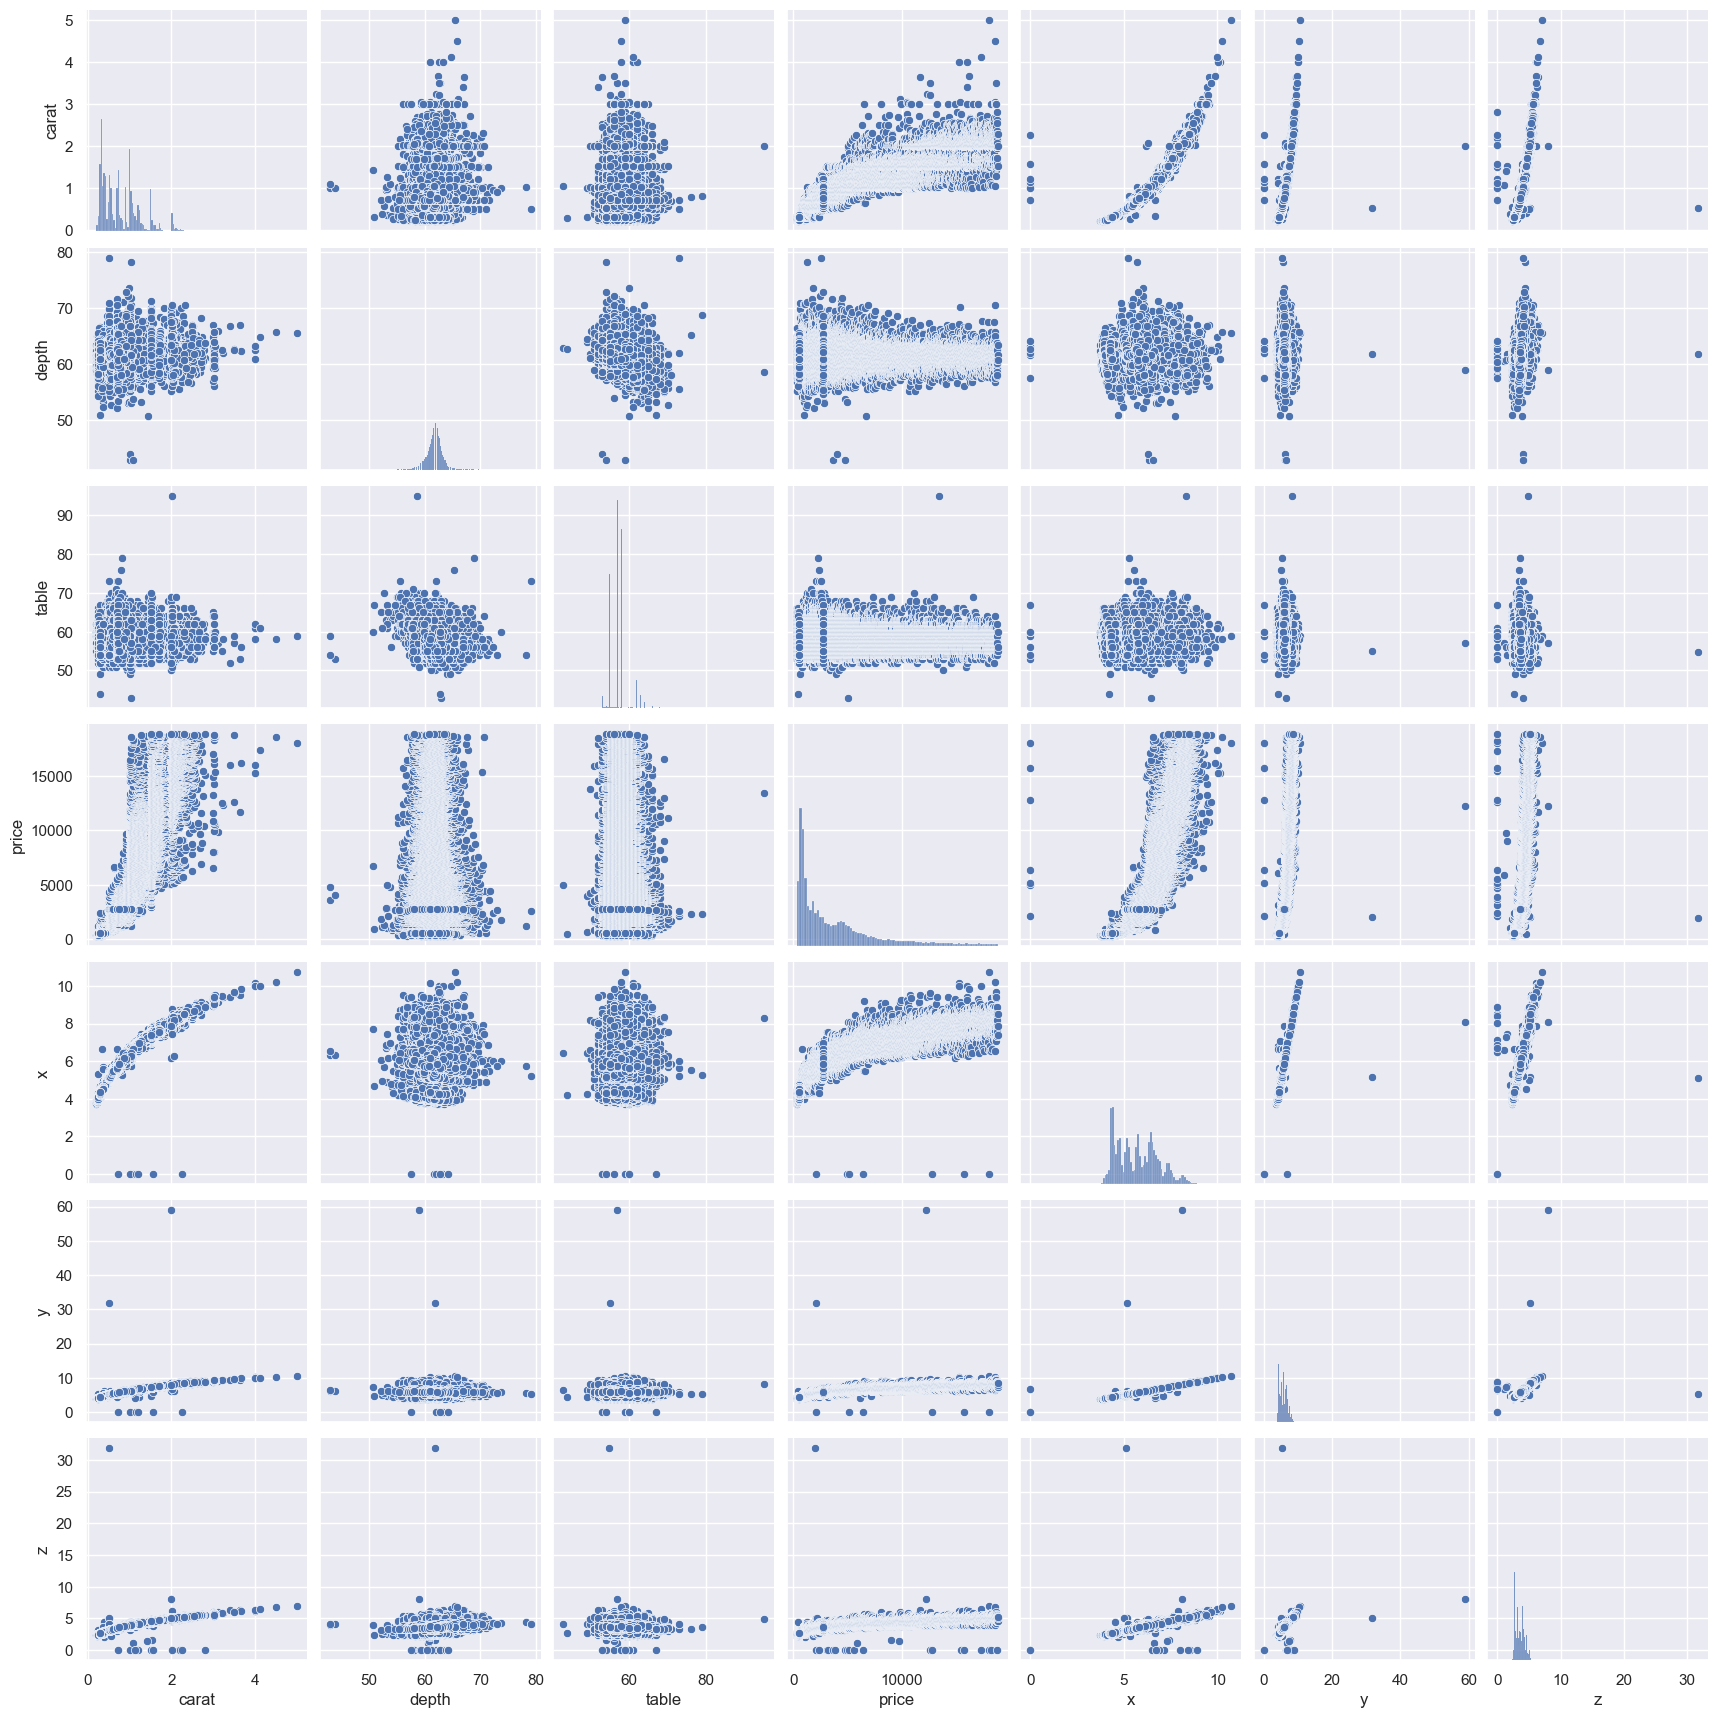

In [26]:
sns.pairplot(diamonds)

### Interpreting Log-Transformed Coefficients

But with this transformed target, how do I now interpret my LR coefficients?

Before the transformation, I would have said that a one-unit increase in, say, depth results on average in a 0.0319 increase in price. But what I need to say now is that a one-unit increase in depth results on average in a 0.0319 increase *in the logarithm of price*, i.e. an increase in price by a factor of $e^{0.0319}$.

In [27]:
print(f"""
A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.0319), 3)},
or {100 * round(np.exp(0.0319) - 1, 3)}%.
""")


A one-unit increase in the depth variable corresponds
to an increase in price by a factor of 1.032,
or 3.2%.



For more on this, including how to interpret coefficients after log-transforming *independent* variables, check out [this resource](https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/).

## Binning

To start we'll look at some `seaborn` Pair Plots. We'll do this in two halves so that we can see things a bit more clearly:

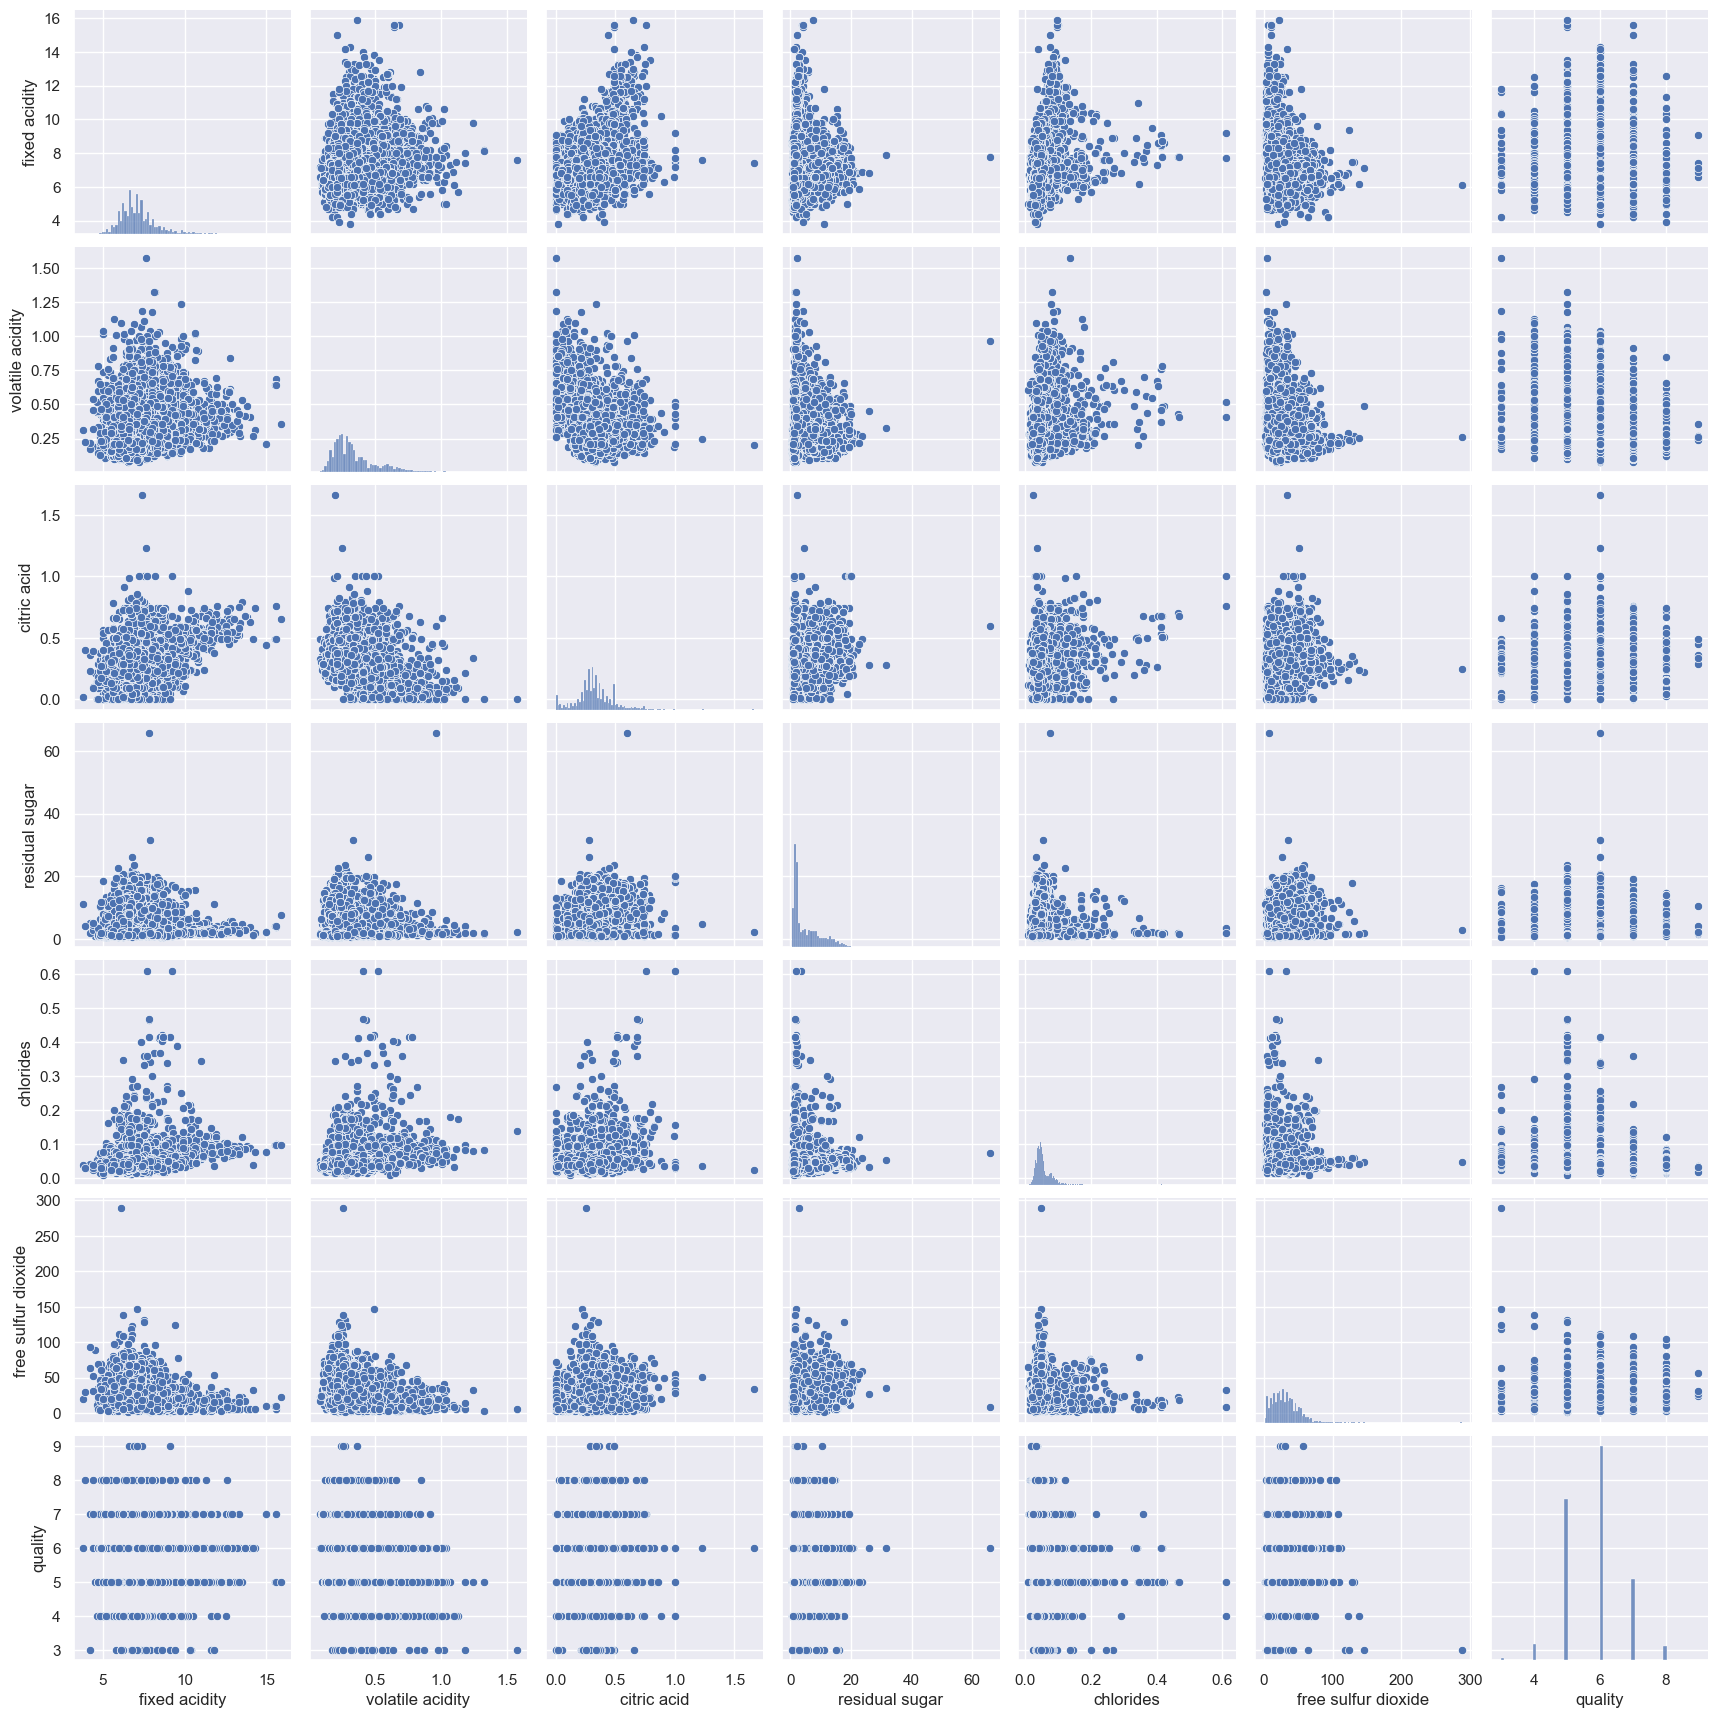

In [28]:
# This will show the first six predictors and 'quality'
columns = [True if j < 6 or j == 11 else False for j in range(13)]

sns.pairplot(data=wine.iloc[:, columns]);

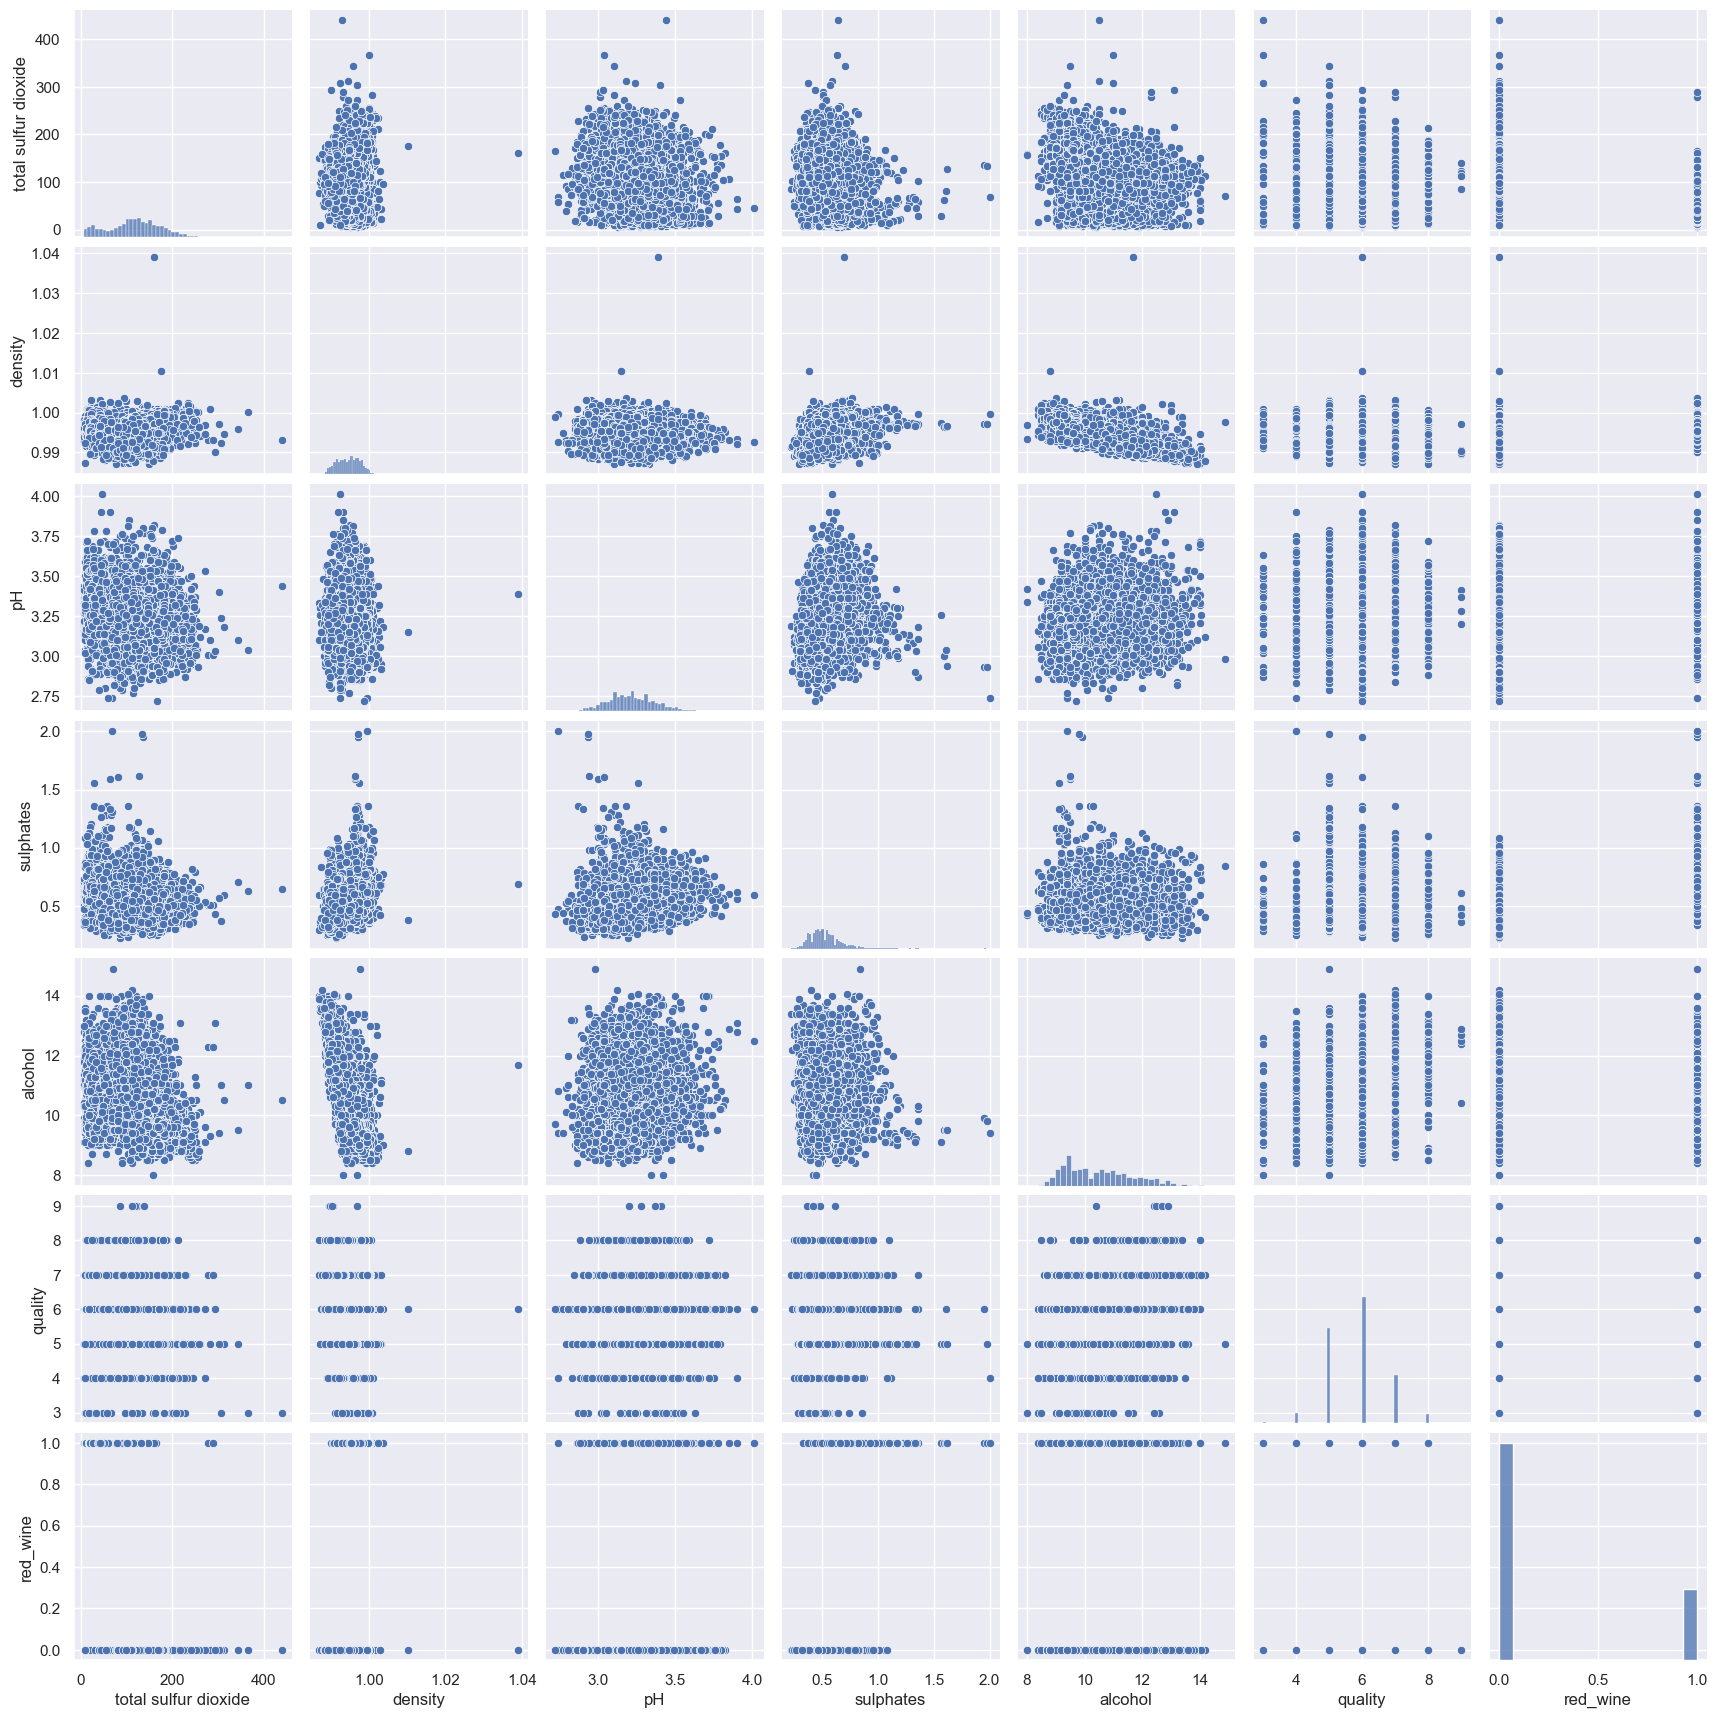

In [29]:
sns.pairplot(data=wine.iloc[:, 6:]);

### Volatile Acidity

Let's look at the distribution of the volatile acidity feature:

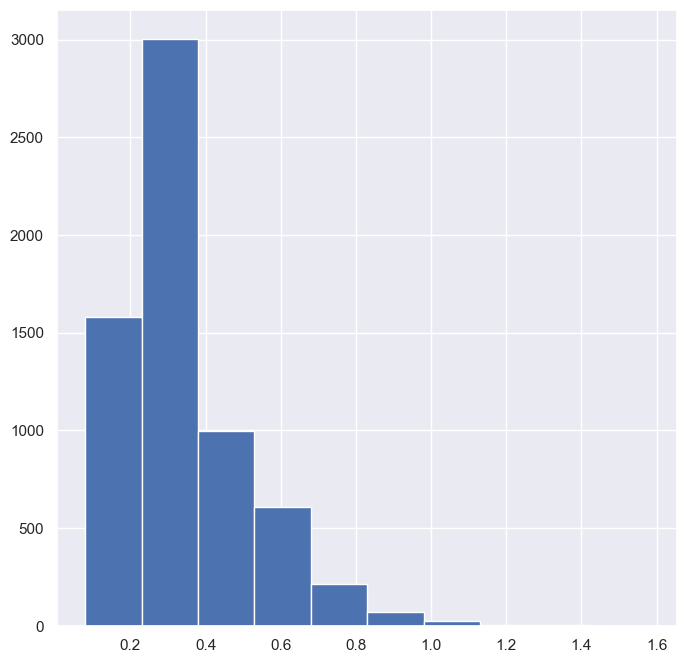

In [30]:
wine['volatile acidity'].hist();

Suppose we add more bins:

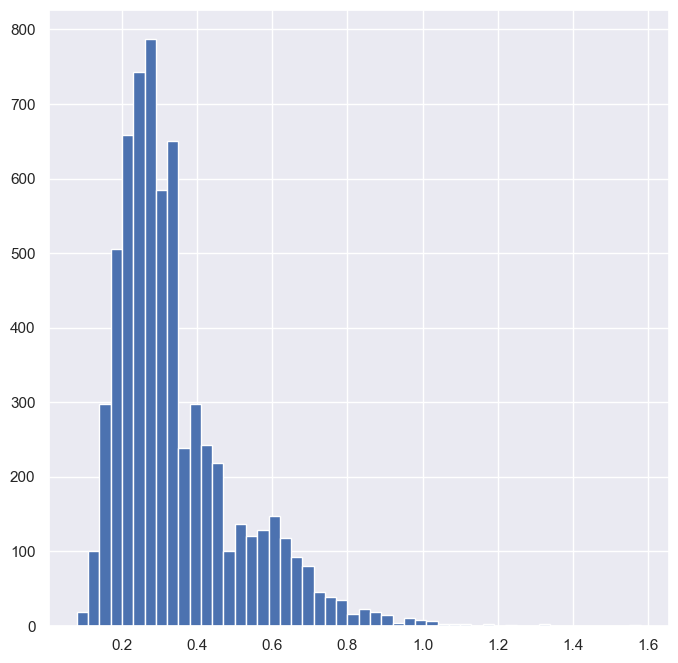

In [31]:
wine['volatile acidity'].hist(bins=50);

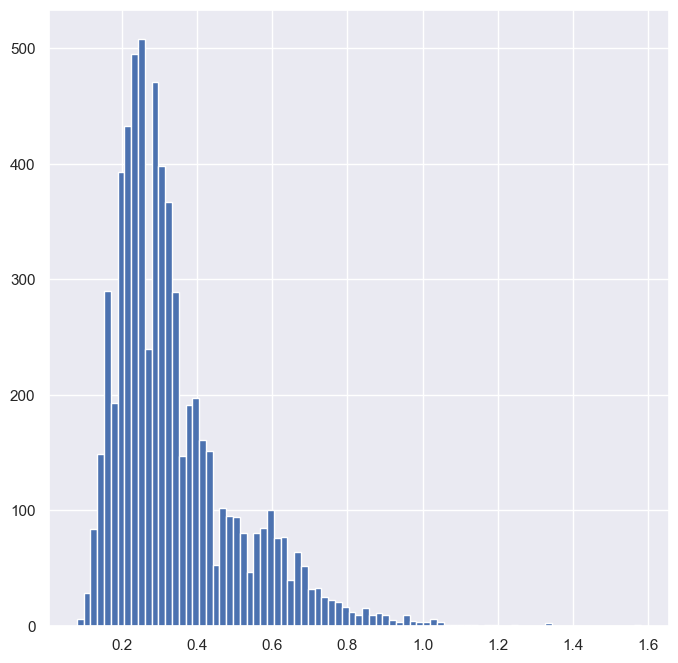

In [32]:
wine['volatile acidity'].hist(bins='auto');

Now the distribution looks quite different. There seems to be a small second peak around 0.6. And we can reproduce this if we check out `seaborn`'s kernel density plot.

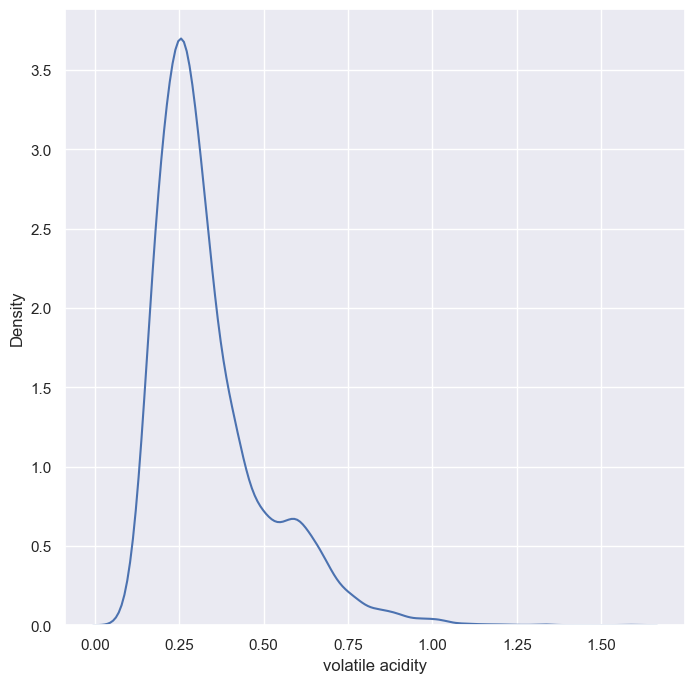

In [33]:
sns.kdeplot(wine['volatile acidity']);

So suppose we build a new feature that records whether a wine's volatile acidity is above 0.5.

In [34]:
wine['high_va'] = wine['volatile acidity'] > .55

In [35]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,high_va
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,True


In [36]:
wine.corr()['quality']['high_va']

-0.217422170005528

In [37]:
# Now we can build a new model with this feature.

wine_preds2 = wine[['alcohol', 'density', 'high_va']]

In [38]:
lr2 = LinearRegression().fit(wine_preds2, wine_target)

In [39]:
lr2.score(wine_preds2, wine_target)

0.23109373356469876

In [40]:
lr2.coef_

array([ 0.3422338 , 16.89253911, -0.50264401])

Not bad! We don't seem to have stumbled onto a huge connection here, but this correlation value suggests that this new feature may be helpful in a final model.

### $\bf{SO_2}$

Next we'll take a look at distribution of the sulfur dioxide feature:

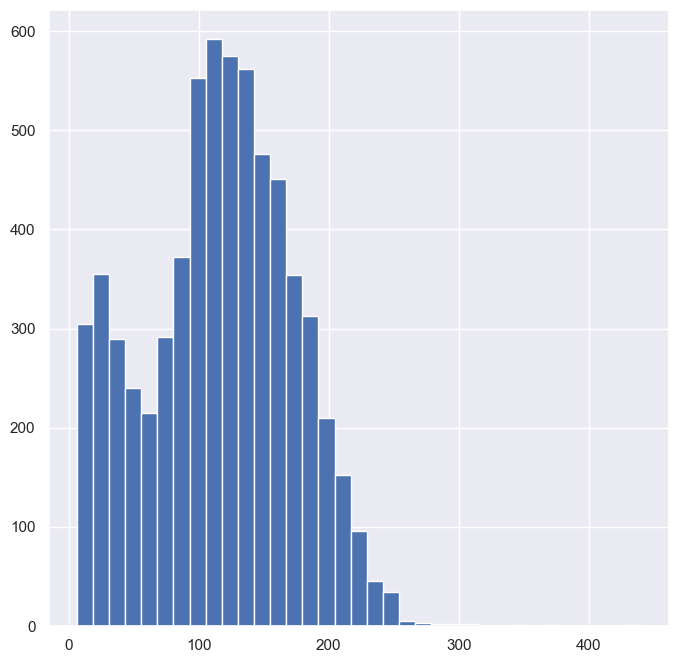

In [41]:
wine['total sulfur dioxide'].hist(bins=35);

Let's try separating our wines into those with sulfur dioxide higher than 80 and those with less:

In [42]:
wine['high_so2'] = wine['total sulfur dioxide'] > 80

In [43]:
wine.corr()['quality']['high_so2']

0.08074521567590653

Not great. Perhaps this is a modeling dead end.

## Products of Features

Another engineering strategy we might try is **multiplying features together**.

Let's try these two features: `residual sugar` and `total sulfur dioxide`. Note that without domain knowledge or exploration, this is really a guess that this combination will predict `quality` well.

In [44]:
wine['rs*tsd'] = wine['residual sugar'] * wine['total sulfur dioxide']

In [45]:
wine.corr()['quality']['rs*tsd']

-0.06622845877790014

In [46]:
wine.corr()['quality']['residual sugar']

-0.036980484585769566

In [47]:
wine.corr()['quality']['total sulfur dioxide']

-0.041385453855609024

We can see these two features together have a higher correlation than each by itself!

## Polynomial Features

Instead of just multiplying features at random, we might consider trying **every possible product of features**. That's what PolynomialFeatures does:

In [48]:
pf = PolynomialFeatures(degree=3)

X = wine.drop(['quality'], axis=1)
y = wine['quality']

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures(degree=3)

In [49]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine,high_va,high_so2,rs*tsd
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,True,False,64.6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,True,False,174.2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,True,False,124.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,False,False,114.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,True,False,64.6


In [50]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,high_va,high_so2,rs*tsd
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,True,False,64.6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,True,False,174.2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,True,False,124.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,False,False,114.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,True,False,64.6


In [51]:
X.shape

(6497, 15)

In [52]:
pf.transform(X)

array([[1.00000000e+00, 7.40000000e+00, 7.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.69586136e+05],
       [1.00000000e+00, 7.80000000e+00, 8.80000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.28621049e+06],
       [1.00000000e+00, 7.80000000e+00, 7.60000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.91586449e+06],
       ...,
       [1.00000000e+00, 6.50000000e+00, 2.40000000e-01, ...,
        1.33200000e+02, 1.77422400e+04, 2.36326637e+06],
       [1.00000000e+00, 5.50000000e+00, 2.90000000e-01, ...,
        1.21000000e+02, 1.46410000e+04, 1.77156100e+06],
       [1.00000000e+00, 6.00000000e+00, 2.10000000e-01, ...,
        7.84000000e+01, 6.14656000e+03, 4.81890304e+05]])

In [54]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names_out())
pdf

,1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,high_va^3,high_va^2 high_so2,high_va^2 rs*tsd,high_va high_so2^2,high_va high_so2 rs*tsd,high_va rs*tsd^2,high_so2^3,high_so2^2 rs*tsd,high_so2 rs*tsd^2,rs*tsd^3
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,...,1.0,0.0,64.6,0.0,0.0,4173.16,0.0,0.0,0.00,2.695861e+05
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,...,1.0,0.0,174.2,0.0,0.0,30345.64,0.0,0.0,0.00,5.286210e+06
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,...,1.0,0.0,124.2,0.0,0.0,15425.64,0.0,0.0,0.00,1.915864e+06
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.481544e+06
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,...,1.0,0.0,64.6,0.0,0.0,4173.16,0.0,0.0,0.00,2.695861e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,147.2,21667.84,3.189506e+06
6493,1.0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1344.0,1806336.00,2.427716e+09
6494,1.0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,133.2,17742.24,2.363266e+06
6495,1.0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,121.0,14641.00,1.771561e+06


In [55]:
pdf.shape

(6497, 816)

In [56]:
pdf2 = pdf.drop(columns=['1'])

In [57]:
lr = LinearRegression()

lr.fit(pdf2, y)

LinearRegression()

In [58]:
lr.score(pdf2, y)

0.48248975764922997

In [59]:
lr.intercept_

228.3177850317521

In [60]:
lr.coef_

array([ 1.37573419e+01, -5.75423807e+01, -4.13759836e+02,  3.78241047e+02,
       -2.42775081e+02, -3.69081136e+01,  8.72188339e+00, -2.84192643e+01,
        2.02958804e+02,  2.62459719e+02, -2.86500114e+02,  1.37953279e+02,
        4.22815490e+02, -1.66346218e+02, -4.39384190e+00,  5.58501792e+00,
       -1.21514484e+02, -3.77802094e+02, -2.66793872e+01,  2.07033791e+02,
       -3.24631910e+00, -7.29690693e-01,  2.12619867e+02, -1.30342654e+02,
        2.87115260e+02,  3.30711051e+01, -6.47564361e+01, -3.77271585e+01,
        8.74401855e+00,  3.82105282e-02,  3.41412080e+02,  9.68160515e+01,
        2.72084217e+02, -1.61879966e+02,  2.05963990e+01,  5.97983418e+00,
        6.62778146e+00, -6.89916991e+02,  6.46038312e+02,  3.72279414e+01,
        4.52068975e+02,  1.90012167e+02,  3.93735198e+02, -9.36973246e-01,
        2.46602544e+03,  9.09953161e+01, -2.04250763e+01,  3.29886208e+00,
        3.17286915e+01,  6.83213037e+01,  1.66471671e+02, -1.67294337e+03,
       -1.56712700e+02,  

In [61]:
sm.OLS(y, pdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     11.25
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:18:15   Log-Likelihood:                -6060.3
No. Observations:                6497   AIC:                         1.320e+04
Df Residuals:                    5958   BIC:                         1.685e+04
Df Model:                         538                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
1                                                           -17.9979    102.850     -0.175      0.861    -219.620     183.625
fixed acidity                                              -125.1654    162.333     -0.771      0.441    -443.398     193.067
volatile acidity                                             25.0451     43.178      0.580      0.562     -59.600     109.690
citric acid                                                 -16.3419     32.262     -0.507      0.612     -79.587      46.903
residual sugar                                              191.3054    110.954      1.724      0.085     -26.205     408.815
chlorides                                                  -150.7167    179.783     -0.838      0.402    -503.156     201.722
free sulfur dioxide                                         -28.2347     28.577     -0.988      0.323     -84.255      27.786
total sulfur dioxide                                        -54.7784     37.435     -1.463      0.143    -128.164      18.607
density                                                      18.9177     39.532      0.479      0.632     -58.579      96.414
pH                                                           66.6658     82.169      0.811      0.417     -94.415     227.747
sulphates                                                   -78.1358     33.076     -2.362      0.018    -142.976     -13.296
alcohol                                                     172.5744    121.695      1.418      0.156     -65.992     411.140
red_wine                                                   -122.0909     52.026     -2.347      0.019    -224.081     -20.100
high_va                                                      66.9238     50.325      1.330      0.184     -31.731     165.579
high_so2                                                     27.6745     32.936      0.840      0.401     -36.892      92.241
rs*tsd                                                       -0.7464      8.981     -0.083      0.934     -18.353      16.860
fixed acidity^2                                               6.5024      7.970      0.816      0.415      -9.122      22.127
fixed acidity volatile acidity                              -36.7736    117.628     -0.313      0.755    -267.367     193.819
fixed acidity citric acid                                   -22.9654     97.828     -0.235      0.814    -214.743     168.813
fixed acidity residual sugar                                -11.3325     17.327     -0.654      0.513     -45.299      22.634
fixed acidity chlorides                                      52.0640     78.432      0.664      0.507    -101.691     205.819
fixed acidity free sulfur dioxide                          

So: Is this a good idea? What are the potential dangers here?

## Exercise

Consider the following dataset:

In [ ]:
sales = pd.read_csv('data/Advertising.csv', index_col=0)

sales.head()

We'd like to try to understand sales as a function of spending on various media (TV, radio, newspaper).

In [ ]:
sales.corr()['sales']

**Try to find the best multiplicative combination of features.**

You may use `PolynomialFeatures` or just multiply by hand.

In practice, it's not easy to tell when such products of features will be so fruitful. Moreover, there is room for concern about violating regression's demand for feature independence. At the very least, we would probably not want to include a product *and the individual features themselves* in a final model, not if our goal is to understand what's really responsible for fluctuations in our target variable.